## Optimisation Methods: Assignment 3 Lillo Giorgia

### Part 2: programming problems

#### Problem 1 (Bell curve fitting)


#### 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataset_1 = np.loadtxt("dataset1.csv", skiprows=2, delimiter=",")

#### 1.2

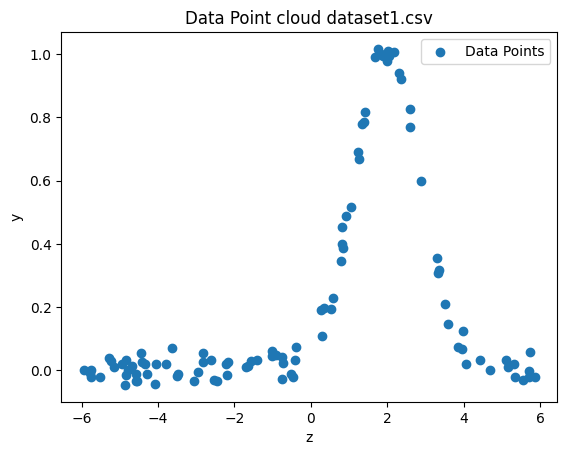

In [2]:
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], label="Data Points")
plt.xlabel("z")
plt.ylabel("y")
plt.title("Data Point cloud dataset1.csv")
plt.legend()
plt.show()

#### 1.3

In [3]:
def m(z, x): # bell curve
    return np.exp(-((z - x[0])**2) / x[1])

def f(x, data):
    N = len(data)
    return (1/N) * np.sum((m(data[:, 0], x) - data[:, 1])**2)

f1 = f([1, 0.5], dataset_1)
f2 = f([0.5, 1], dataset_1)
print(f"f(x =(1, 0.5)) = {f1}")
print(f"f(x =(0.5, 1)) = {f2}")

f(x =(1, 0.5)) = 0.11204289613814822
f(x =(0.5, 1)) = 0.15009253657239355


#### 1.4

We have the following objective function: 

$
f(x) = \frac{1}{N} \sum_{i=1}^{N} \left( m(z^{(i)}; x) - y^{(i)} \right)^2
$

where the model of the form corresponds to:

$
m(z; x) = \exp \left( -\frac{(z - x_1)^2}{x_2} \right)
$

To find the gradient of $f(x)$ we need to calculate the partial derivatives of $f(x)$ with respect to  $x_1$ and $x_2$.

#### 1. Derivatives with respect to $x_1$:

$
\frac{\partial f}{\partial x_1} = 2 \frac{1}{N} \sum_{i=1}^{N} \left( m(z^{(i)}; x) - y^{(i)} \right) \frac{\partial m}{\partial x_1}
$

where   

$\frac{\partial m}{\partial x_1} = \frac{2(z^{(i)} - x_1)}{x_2} \exp \left( -\frac{(z - x_1)^2}{x_2} \right).$

Then if we substitute we will obtain:

$\frac{\partial f}{\partial x_1} = \frac{2}{N} \sum_{i=1}^{N} \left[ \exp \left( -\frac{(z^{(i)} - x_1)^2}{x_2} \right) - y^{(i)} \right] \frac{2(z^{(i)} - x_1)}{x_2} \exp \left( -\frac{(z^{(i)} - x_1)^2}{x_2} \right).$


#### 2. Derivatives with respect to $x_2$:

$
\frac{\partial f}{\partial x_2} = 2 \frac{1}{N} \sum_{i=1}^{N} \left( m(z^{(i)}; x) - y^{(i)} \right) \frac{\partial m}{\partial x_2}
$

where   

$\frac{\partial m}{\partial x_2} = \frac{(z^{(i)} - x_1)^2}{x_2^2}\exp \left( -\frac{(z - x_1)^2}{x_2} \right)$

Then if we substitute we will obtain:

$\frac{\partial f}{\partial x_2} = \frac{2}{N} \sum_{i=1}^{N} \left[ \exp \left( -\frac{(z^{(i)} - x_1)^2}{x_2} \right) - y^{(i)} \right] \frac{(z^{(i)} - x_1)^2}{x_2^2}\exp \left( -\frac{(z - x_1)^2}{x_2} \right).$

Then combining the derivatives we can prove that:

$\frac{\partial f}{\partial x_2} = \frac{2}{N} \sum_{i=1}^{N} \frac{(z^{(i)} - x_1)}{x_2} \exp \left( -\frac{(z^{(i)} - x_1)^2}{x_2} \right) \left[ \exp \left( -\frac{(z^{(i)} - x_1)^2}{x_2} \right) - y^{(i)} \right]. \begin{bmatrix}
 2 \\
 \frac{2(z^{(i)} - x_1)}{x_2}
\end{bmatrix}$



#### 1.5

In [4]:
def gradient_f(x, data):
    N = len(data)
    res = np.zeros(2) 
    for i in range(N):
        z = data[i, 0]
        y = data[i, 1]
        exp = np.exp(-((z - x[0])**2) / x[1])
        e = exp * (exp - y)
        derivs = np.array([
            2 * (z - x[0]) / x[1],     
            (z - x[0])**2 / x[1]**2    
        ])         
        res += e * derivs  
    res = (2/N) * res  
    return res

print(f"∇f(x =(1, 0.5)) = {gradient_f([1, 0.5], dataset_1)}")
print(f"∇f(x =(0.5, 1)) = {gradient_f([0.5, 1], dataset_1)}")


∇f(x =(1, 0.5)) = [-0.15222549 -0.0578975 ]
∇f(x =(0.5, 1)) = [-0.09240185 -0.02646519]


#### 1.6

In [5]:
def gradient_desc(data, alpha, x_start, max_iter=1000, tol=1e-6):
    x = np.array(x_start, dtype=float)  
    k = 0
    while k < max_iter:
        g_k = gradient_f(x, data)  
        if np.linalg.norm(g_k) < tol:
            print(f"Convergence reached in {k} iterations")
            break
        x -= alpha * g_k  
        print(f"Iteration {k}: x = {x}, f(x) = {f(x, data)}, ||∇f(x)|| = {np.linalg.norm(g_k)}")
        k += 1
    return x

#### 1.7

In [6]:
alphas = [0.1, 1, 10, 100]
starting_points = [[2, 5], [0, 2], [0, 1]]

res = []  
for a in alphas:
    for x0 in starting_points:
        print(f"\nα = {a}, x0 = {x0}")
        x_opt = gradient_desc(dataset_1, a, x0)
        res.append((a, x0, x_opt))  


α = 0.1, x0 = [2, 5]
Iteration 0: x = [2.00115894 4.99864062], f(x) = 0.04034458229125371, ||∇f(x)|| = 0.017863549100416338
Iteration 1: x = [2.00230804 4.99728131], f(x) = 0.04031295742836538, ||∇f(x)|| = 0.017799291710764595
Iteration 2: x = [2.00344736 4.99592207], f(x) = 0.04028155721861779, ||∇f(x)|| = 0.017735820258451
Iteration 3: x = [2.00457699 4.9945629 ], f(x) = 0.04025037811556948, ||∇f(x)|| = 0.017673127983072703
Iteration 4: x = [2.00569699 4.9932038 ], f(x) = 0.04021941662569591, ||∇f(x)|| = 0.017611208130796866
Iteration 5: x = [2.00680744 4.99184478], f(x) = 0.04018866930767094, ||∇f(x)|| = 0.017550053955190634
Iteration 6: x = [2.00790841 4.99048583], f(x) = 0.0401581327716561, ||∇f(x)|| = 0.017489658718047748
Iteration 7: x = [2.00899998 4.98912696], f(x) = 0.04012780367859776, ||∇f(x)|| = 0.01743001569021164
Iteration 8: x = [2.01008222 4.98776816], f(x) = 0.04009767873953227, ||∇f(x)|| = 0.017371118152394432
Iteration 9: x = [2.01115519 4.98640945], f(x) = 0.04006

In [7]:
print("\nFinal results:")
for a, x0, x_opt in res:
    print(f"α = {a}, x0 = {x0} → optimal_x = {x_opt}")


Final results:
α = 0.1, x0 = [2, 5] → optimal_x = [2.09649739 3.66094605]
α = 0.1, x0 = [0, 2] → optimal_x = [2.00817422 1.63950783]
α = 0.1, x0 = [0, 1] → optimal_x = [1.99069208 1.45902444]
α = 1, x0 = [2, 5] → optimal_x = [1.99572776 1.50651643]
α = 1, x0 = [0, 2] → optimal_x = [1.99572779 1.50651681]
α = 1, x0 = [0, 1] → optimal_x = [1.99571775 1.50641875]
α = 10, x0 = [2, 5] → optimal_x = [1.99572763 1.50651518]
α = 10, x0 = [0, 2] → optimal_x = [1.99572996 1.50650164]
α = 10, x0 = [0, 1] → optimal_x = [1.99571817 1.5064682 ]
α = 100, x0 = [2, 5] → optimal_x = [-13.50780891   2.40969829]
α = 100, x0 = [0, 2] → optimal_x = [10.90834318  2.67777815]
α = 100, x0 = [0, 1] → optimal_x = [8.84043352 0.4049874 ]


As we can see for α = 1, 10 the method converges to a optimal solution that is close to [1.99, 1.50], independently from the starting points. For α = 0.1 we also have good optimal solutions. This means that these values of α ensure a good convergence. Whereas for α = 100 the method does not converges in a good manner, producing solution far from the optimal ones. So, values too big does not ensure convergence.

#### 1.8

Iteration 0: x = [2.11589422 4.86406189], f(x) = 0.03778025365492496, ||∇f(x)|| = 0.017863549100416338
Iteration 1: x = [2.1295057  4.72990411], f(x) = 0.035974411188198406, ||∇f(x)|| = 0.013484651133016341
Iteration 2: x = [2.12711873 4.59602504], f(x) = 0.034180542744469876, ||∇f(x)|| = 0.013390034812189412
Iteration 3: x = [2.12283437 4.46205302], f(x) = 0.03238328013058849, ||∇f(x)|| = 0.013404051639364398
Iteration 4: x = [2.11838895 4.32801535], f(x) = 0.03058476320117384, ||∇f(x)|| = 0.013411136737417858
Iteration 5: x = [2.11395495 4.19400538], f(x) = 0.028787752546028642, ||∇f(x)|| = 0.013408329778640368
Iteration 6: x = [2.10954704 4.06013804], f(x) = 0.0269954612619708, ||∇f(x)|| = 0.01339398908223033
Iteration 7: x = [2.10516761 3.9265477 ], f(x) = 0.025211618803550558, ||∇f(x)|| = 0.013366210863453808
Iteration 8: x = [2.10081794 3.79339094], f(x) = 0.023440541290063267, ||∇f(x)|| = 0.013322777987618273
Iteration 9: x = [2.09649852 3.6608501 ], f(x) = 0.021687203974305423,

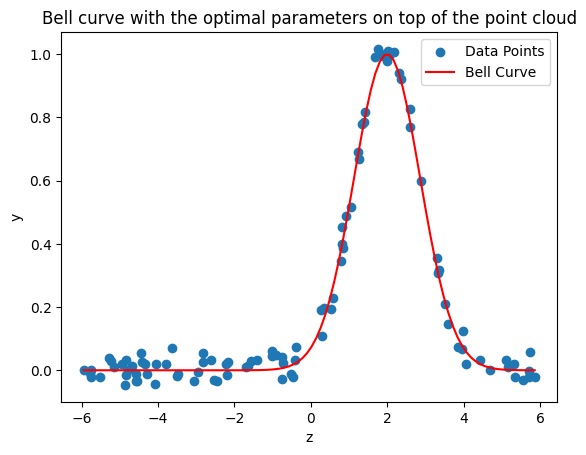

In [8]:
z = np.linspace(min(dataset_1[:, 0]), max(dataset_1[:, 0]), 100)
y = m(z, gradient_desc(dataset_1, 10, [2,5]))
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], label="Data Points")
plt.plot(z, y, color='red', label="Bell Curve")
plt.xlabel("z")
plt.ylabel("y")
plt.legend()
plt.title("Bell curve with the optimal parameters on top of the point cloud")
plt.show()

#### 1.9

In [9]:
dataset_2 = np.loadtxt("dataset2.csv", skiprows=2, delimiter=",")

#### 1.10

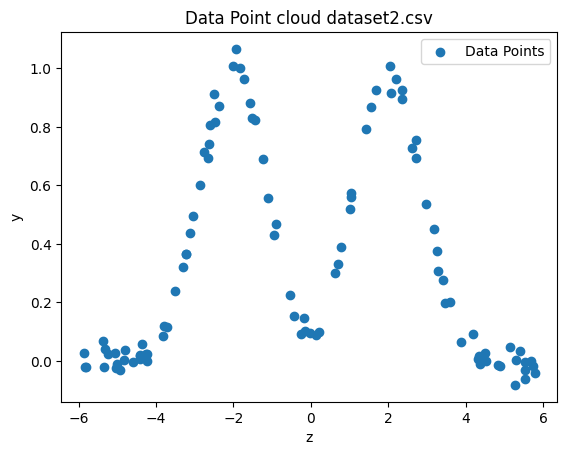

In [10]:
plt.scatter(dataset_2[:, 0], dataset_2[:, 1], label="Data Points")
plt.xlabel("z")
plt.ylabel("y")
plt.title("Data Point cloud dataset2.csv")
plt.legend()
plt.show()

#### 1.11


Test con x0 = [0, 5]
Iteration 0: x = [-0.10151616  5.17340398], f(x) = 0.13730944840288023, ||∇f(x)|| = 0.02009339964311004
Iteration 1: x = [-0.22228218  5.33469127], f(x) = 0.13326948213172574, ||∇f(x)|| = 0.020148950846539244
Iteration 2: x = [-0.35636688  5.48175718], f(x) = 0.12938681716742734, ||∇f(x)|| = 0.0199015297825084
Iteration 3: x = [-0.49441374  5.61226624], f(x) = 0.12593018003865505, ||∇f(x)|| = 0.018997250026586907
Iteration 4: x = [-0.62510397  5.72462356], f(x) = 0.12316345569092717, ||∇f(x)|| = 0.017234877978242916
Iteration 5: x = [-0.73818768  5.81885339], f(x) = 0.12119975598348673, ||∇f(x)|| = 0.014719778272506324
Iteration 6: x = [-0.82752697  5.89681042], f(x) = 0.11995206069303109, ||∇f(x)|| = 0.011856984251267867
Iteration 7: x = [-0.89214491  5.96159318], f(x) = 0.11921567284610081, ||∇f(x)|| = 0.00915001884540349
Iteration 8: x = [-0.93494126  6.01662773], f(x) = 0.11878463831815335, ||∇f(x)|| = 0.006971605531754342
Iteration 9: x = [-0.96049838  6.0649

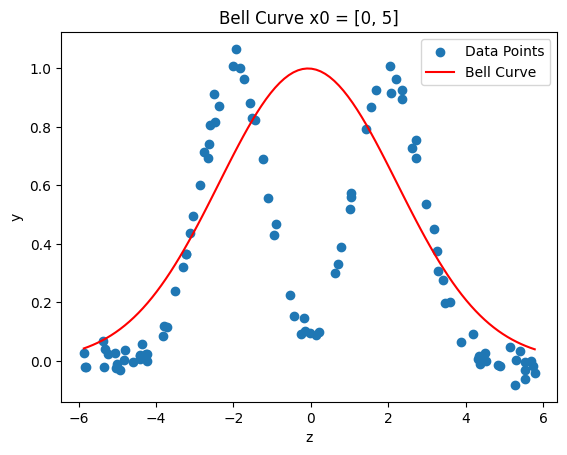


Test con x0 = [-1, 1]
Iteration 0: x = [-2.08371425  1.27944557], f(x) = 0.10581170640010047, ||∇f(x)|| = 0.11191632576370375
Iteration 1: x = [-1.9445212   1.32124709], f(x) = 0.10554181240765605, ||∇f(x)|| = 0.014533434540522234
Iteration 2: x = [-2.06950544  1.37335291], f(x) = 0.10533815845642598, ||∇f(x)|| = 0.013541076486363341
Iteration 3: x = [-1.94821869  1.39372231], f(x) = 0.10519008132794667, ||∇f(x)|| = 0.012298530873743954
Iteration 4: x = [-2.05230479  1.42742805], f(x) = 0.10506889983975025, ||∇f(x)|| = 0.01094074549344008
Iteration 5: x = [-1.95756673  1.43820059], f(x) = 0.10498031891199325, ||∇f(x)|| = 0.009534855691058419
Iteration 6: x = [-2.03644657  1.46054876], f(x) = 0.10491112882733016, ||∇f(x)|| = 0.008198457441557222
Iteration 7: x = [-1.96721559  1.46667536], f(x) = 0.1048620394072604, ||∇f(x)|| = 0.006950154096849484
Iteration 8: x = [-2.02368794  1.48163149], f(x) = 0.10482568695100643, ||∇f(x)|| = 0.005841927772930052
Iteration 9: x = [-1.97520277  1.48

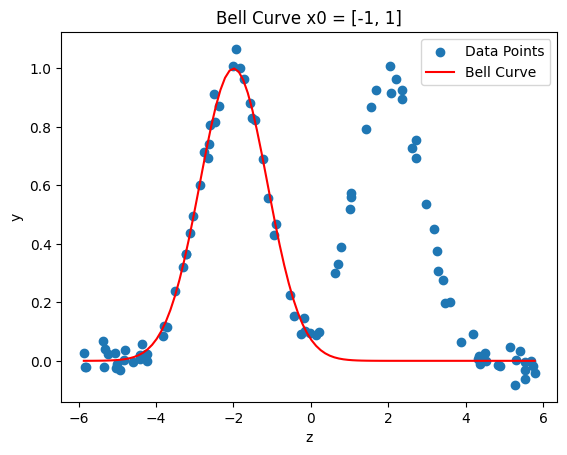


Test con x0 = [1, 1]
Iteration 0: x = [1.89744464 1.24682658], f(x) = 0.13452863059804931, ||∇f(x)|| = 0.09307686340636893
Iteration 1: x = [2.04039009 1.32559678], f(x) = 0.13352015995482439, ||∇f(x)|| = 0.016321196313797463
Iteration 2: x = [1.96999041 1.3750456 ], f(x) = 0.1331426165937911, ||∇f(x)|| = 0.008603081410078975
Iteration 3: x = [1.99759011 1.4175844 ], f(x) = 0.13296698982434868, ||∇f(x)|| = 0.005070791717080222
Iteration 4: x = [1.98284172 1.44948589], f(x) = 0.1328658711776901, ||∇f(x)|| = 0.003514569504332447
Iteration 5: x = [1.98700007 1.47616966], f(x) = 0.1328014919494827, ||∇f(x)|| = 0.0027005847392469196
Iteration 6: x = [1.98347405 1.49768211], f(x) = 0.1327584215089513, ||∇f(x)|| = 0.002179949967738286
Iteration 7: x = [1.98347057 1.5156609 ], f(x) = 0.13272884379492372, ||∇f(x)|| = 0.0017978794939125333
Iteration 8: x = [1.98224133 1.53060163], f(x) = 0.1327081875078877, ||∇f(x)|| = 0.001499121065312468
Iteration 9: x = [1.9817053  1.54317834], f(x) = 0.1326

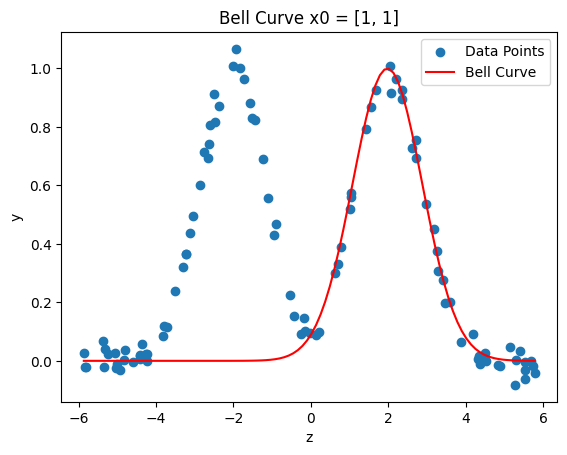

In [11]:
starting_points = [[0, 5], [-1, 1], [1, 1]]
alpha = 10  

for x0 in starting_points:
    print(f"\nTest con x0 = {x0}")
    x_opt = gradient_desc(dataset_2, alpha, x0)
    z = np.linspace(min(dataset_2[:, 0]), max(dataset_2[:, 0]), 100)
    y = m(z, x_opt)
    plt.scatter(dataset_2[:, 0], dataset_2[:, 1], label="Data Points")
    plt.plot(z, y, color='red', label="Bell Curve")
    plt.xlabel("z")
    plt.ylabel("y")
    plt.legend()
    plt.title(f"Bell Curve x0 = {x0}")
    plt.show()


As we can see from the plots, the convergence to different local optima of the gradient descent depends on the starting point. In the first case x = (0, 5) the bell curve is centered around zero and fits well with the overall data distribution. In the second case x = (-1, 1) we have the bell curve in left part, this means that the optimization process converged to a local optimum influenced by the initial conditions. In the last case x = (1, 1) it is the opposite than the second one, the bell curve is in the right part and also in this case the optimization result is dependent on the starting point. 

#### 1.12

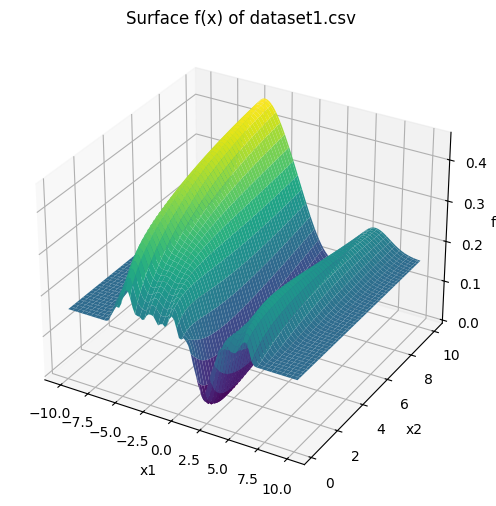

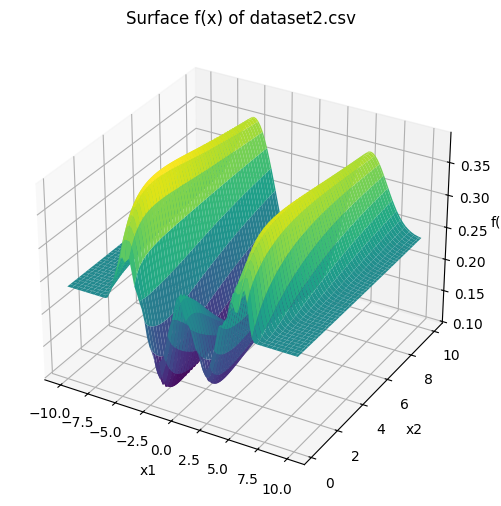

In [12]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(data, title):
    x1 = np.linspace(-10, 10, 100)
    x2 = np.linspace(0.2, 10, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            Z[i, j] = f([X1[i, j], X2[i, j]], data)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("f(x)")
    ax.set_title(title)
    plt.show()

plot_3d(dataset_1, "Surface f(x) of dataset1.csv")
plot_3d(dataset_2, "Surface f(x) of dataset2.csv")

#### Problem 2 (Newton’s algorithm)

In [13]:
def f_biv(x):
    return 100 * (x[1] - x[0]**2)**2 + (x[0] - 1)**2

Our bivariate function $f(x)$ correspond to:

$f(x) = 100 (x_2 - x_1^2)^2 + (x_1 - 1)^2$ 

We first calculate the partial derivatives with respect to $x_1$ and $x_2$:

1.  Derivative of $x_1$ : 
$
\frac{\partial f}{\partial x_1} = -400 x_1 (x_2 - x_1^2) + 2 (x_1 - 1)
$

2.  Derivative of $x_2$ : 
$
\frac{\partial f}{\partial x_2} = 200 (x_2 - x_1^2)
$

The gradient of the bivariate function $f(x)$ is:

$
\nabla f(x) =
\begin{bmatrix}
 \frac{\partial f}{\partial x_1} \\
 \frac{\partial f}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
-400 x_1 (x_2 - x_1^2) + 2 (x_1 - 1) \\
200 (x_2 - x_1^2)
\end{bmatrix}
$

In [14]:
def der1(x):
    x1_der = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
    x2_der = 200 * (x[1] - x[0]**2)
    return np.array([x1_der, x2_der])

We now calculate the second partial derivatives with respect to $x_1$ and $x_2$:

1. Second derivative of $x_1$ : 
$
\frac{\partial f}{\partial x_1} = 1200 (x_1^2) - 400 (x_2) + 2
$
2. Second derivative of $x_1 x_2$ : 
$
\frac{\partial f}{\partial x_2} = - 400 (x_1) 
$
3. Second derivative of $x_2 x_1$ : 
$
\frac{\partial f}{\partial x_1} = - 400 (x_1) 
$

4. Second derivative of $x_2$ : 
$
\frac{\partial f}{\partial x_2} = 200 $

The second derivative of the bivariate function $f(x)$ is:

$
\nabla f(x) =
\begin{bmatrix}
 \frac{\partial f}{\partial x_1} \frac{\partial f}{\partial x_1 x_2} \\
 \frac{\partial f}{\partial x_2 x_1} \frac{\partial f}{\partial x_2}
\end{bmatrix} =
\begin{bmatrix}
[1200 (x_1^2) - 400 (x_2) + 2] [- 400 (x_1)] \\
[- 400 (x_1)] [200] 
\end{bmatrix}
$

In [15]:
def der2(x):
    x1_1 = 1200 * (x[0]**2) - 400*x[1]+2
    x1_2 = - 400 * x[0]
    x2_1 = - 400 * x[0]
    x2_2 = 200
    return np.array([[x1_1, x1_2], [x2_1, x2_2]])

In [16]:
def newton_algo(x0, epsilon=1e-6, kmax=100):
    x = np.array(x0, dtype=float) 
    k = 0
    while np.linalg.norm(der1(x)) > epsilon and k <= kmax:
        deri1 = der1(x)
        deri2 = der2(x)
        x = x + np.linalg.solve(deri2, -deri1) 
        k += 1
    return x, k

In [17]:
def gradient_desc_without_print(x0, alpha, max_iter=1000, tol=1e-6):
    x = np.array(x0, dtype=float) 
    k = 0
    while k < max_iter:
        g_k = der1(x)  
        if np.linalg.norm(g_k) < tol:
            break
        x -= alpha * g_k  
        k += 1
    return x, k

In [18]:
x0 = [2, 2]
xnew, knew = newton_algo(x0)
xgd, kgd = gradient_desc_without_print(x0, alpha=0.001)

print(f"Newton's method solution: {xnew}, iterations: {knew}")
print(f"Gradient Descent solution: {xgd}, iterations: {kgd}")


Newton's method solution: [1. 1.], iterations: 5
Gradient Descent solution: [1.20924655 1.46301622], iterations: 1000


As we can see from the results above the Newton’s method converges in 5 iterations, whereas the Gradient Descent converges in 1000 iterations. The first one is more efficient than the second one, this is because the newton's method uses the second-order derivatives, while the gradient descent is slower because it uses only the first-order derivatives. However the Newton's method could be more expensive because it needs to calculate the Hessian matrix.

#### Problem 3 (Newton and Line Search)

#### 3.1

In [19]:
def f(x):
    return 4 * x[0]**2 - 3 * x[0] + x[1]**2 + 2 * x[1]

x0 = np.array([0, 0])
print(f"f(x = (0, 0)) = {f(x0)}")

f(x = (0, 0)) = 0


#### 3.2

In [20]:
def gradf(x):
    x_1 = 8 * x[0] - 3
    x_2 = 2 * x[1] + 2
    return np.array([x_1, x_2])

print(f"∇f(x = (0, 0)) = {gradf(x0)}")

∇f(x = (0, 0)) = [-3  2]


#### 3.3

In [21]:
def hessianf(x):
    x_1_1 = 8 
    x_1_2 = 0
    x_2_2 = 2 
    x_2_1 = 0
    return np.array([[x_1_1, x_1_2], [x_2_1, x_2_2]])

print(f"∇^2f(x = (0, 0)) = {hessianf(x0)}")

∇^2f(x = (0, 0)) = [[8 0]
 [0 2]]


#### 3.4

In [22]:
def newton_direction(x):
    hessian = hessianf(x)
    gradient = gradf(x)
    return np.linalg.solve(hessian, -gradient) 

dN = newton_direction(x0)
prod = np.dot(gradf(x0), dN)

print(f"dN = {dN}")
print(f"∇f(x)^T dN = {prod}")

if prod < 0:
    print("dN is descent direction")
else:
    print("dN is not descent direction")

dN = [ 0.375 -1.   ]
∇f(x)^T dN = -3.125
dN is descent direction


#### 3.5

In [23]:
def line_search_objective(alpha, x, dN):
    return f(x + alpha * dN)

#### 3.6

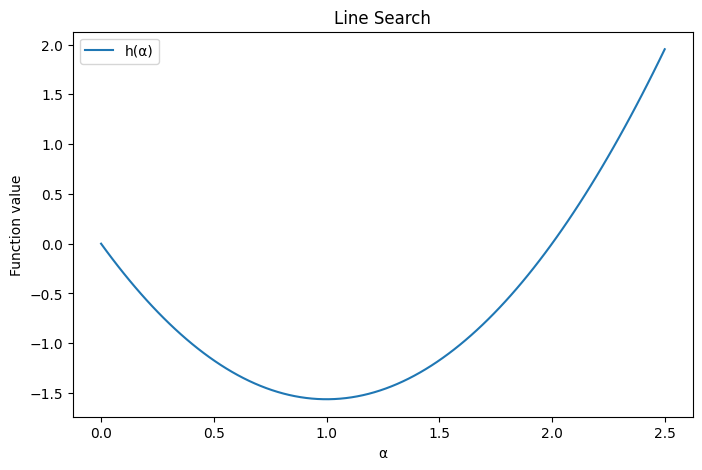

In [24]:
alpha = np.linspace(0, 2.5, 100)
h_values = []
for a in alpha:
    h_values.append(line_search_objective(a, x0, dN))

plt.figure(figsize=(8, 5))
plt.plot(alpha, h_values, label='h(α)')
plt.xlabel('α')
plt.ylabel('Function value')
plt.legend()
plt.title('Line Search')
plt.show()


From the plot we can see that the function ℎ(𝛼) reaches its minimal value at 𝛼 ≈ 1.0. So we can say that the value of α in exact line search would be about 1.0.

#### 3.7

In [25]:
def first_wolfe(alpha, x, dN, relax_par=0.2):
    return f(x) + alpha * relax_par * np.dot(gradf(x), dN)

#### 3.8

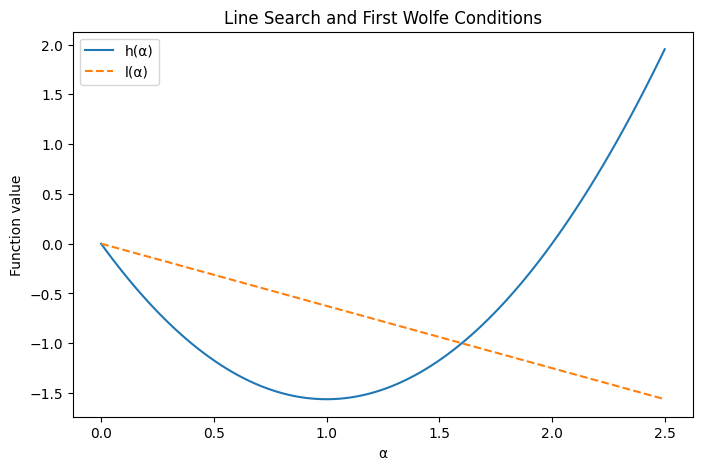

In [26]:
l_values = []
for a in alpha:
    l_values.append(first_wolfe(a, x0, dN))


plt.figure(figsize=(8, 5))
plt.plot(alpha, h_values, label='h(α)')
plt.plot(alpha, l_values, label='l(α)', linestyle='dashed')
plt.xlabel('α')
plt.ylabel('Function value')
plt.legend()
plt.title('Line Search and First Wolfe Conditions')
plt.show()

In [27]:
from scipy.optimize import fsolve

def eq(alpha):
    return line_search_objective(alpha, x0, dN) - first_wolfe(alpha, x0, dN)

a = fsolve(eq, 1.0)  

print(f"Intersection α* ≈ {a[0]}")

Intersection α* ≈ 1.5999999999999996


#### 3.9

We have the second Wolfe condition that is:

$\nabla f(x(0) + \alpha d_N)^T d_N \geq \bar{\eta} \nabla f(x(0))^T d_N
$

where $\bar{\eta} = 0.7$.

Now we need to divide both sides by $\nabla f(x(0))^T d_N$. We are dividing by a negative value, so we also flip the inequality sign, obtaining:

$\frac{\nabla f(x(0) + \alpha d_N)^T d_N}{\nabla f(x(0))^T d_N} \leq \bar{\eta}$

Since $d_N$ is a descent direction, we assume that  $\nabla f(x(0))^T d_N < 0$. These two condition are equivalent. 

In [28]:
def second_wolfe(alpha, x, dN):
    return np.dot(gradf(x + alpha * dN), dN) / np.dot(gradf(x), dN)

#### 3.10

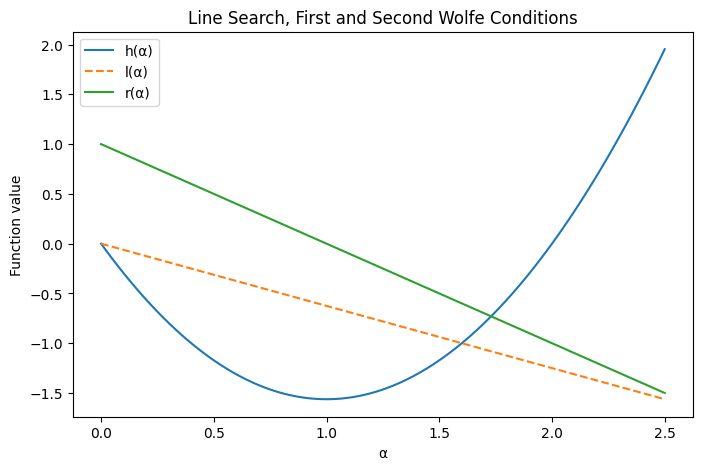

In [29]:
r_values = []
for a in alpha:
    r_values.append(second_wolfe(a, x0, dN))


plt.figure(figsize=(8, 5))
plt.plot(alpha, h_values, label='h(α)')
plt.plot(alpha, l_values, label='l(α)', linestyle='dashed')
plt.plot(alpha, r_values, label='r(α)')
plt.xlabel('α')
plt.ylabel('Function value')
plt.legend()
plt.title('Line Search, First and Second Wolfe Conditions')
plt.show()

In [30]:
n = 0.7
def eq2(alpha):
    return second_wolfe(alpha, x0, dN) - n

a2 = fsolve(eq2, 1.0)  

print(f"α* ≈ {a2[0]}")
print(f"r(α*) = {second_wolfe(a2[0], x0, dN)}, η = 0.7")

α* ≈ 0.29999999999999993
r(α*) = 0.7, η = 0.7
